(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[6]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)  

2024-02-29 15:56:41.079971: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.
2024-02-29 15:56:41.736904: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


Epoch 1/200


2024-02-29 15:56:43.087018: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_3/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


313/313 [==============================] - 11s 28ms/step - loss: 1.7118 - acc: 0.3656 - val_loss: 1.4403 - val_acc: 0.4705
Epoch 2/200
313/313 [==============================] - 8s 26ms/step - loss: 1.2920 - acc: 0.5308 - val_loss: 1.1539 - val_acc: 0.5936
Epoch 3/200
313/313 [==============================] - 8s 26ms/step - loss: 1.0587 - acc: 0.6255 - val_loss: 0.9510 - val_acc: 0.6643
Epoch 4/200
313/313 [==============================] - 8s 26ms/step - loss: 0.9180 - acc: 0.6744 - val_loss: 0.8501 - val_acc: 0.6996
Epoch 5/200
313/313 [==============================] - 8s 26ms/step - loss: 0.8243 - acc: 0.7086 - val_loss: 0.7634 - val_acc: 0.7319
Epoch 6/200
313/313 [==============================] - 8s 26ms/step - loss: 0.7313 - acc: 0.7419 - val_loss: 0.7442 - val_acc: 0.7384
Epoch 7/200
313/313 [==============================] - 8s 26ms/step - loss: 0.6601 - acc: 0.7667 - val_loss: 0.7214 - val_acc: 0.7474
Epoch 8/200
313/313 [==============================] - 8s 26ms/step - los

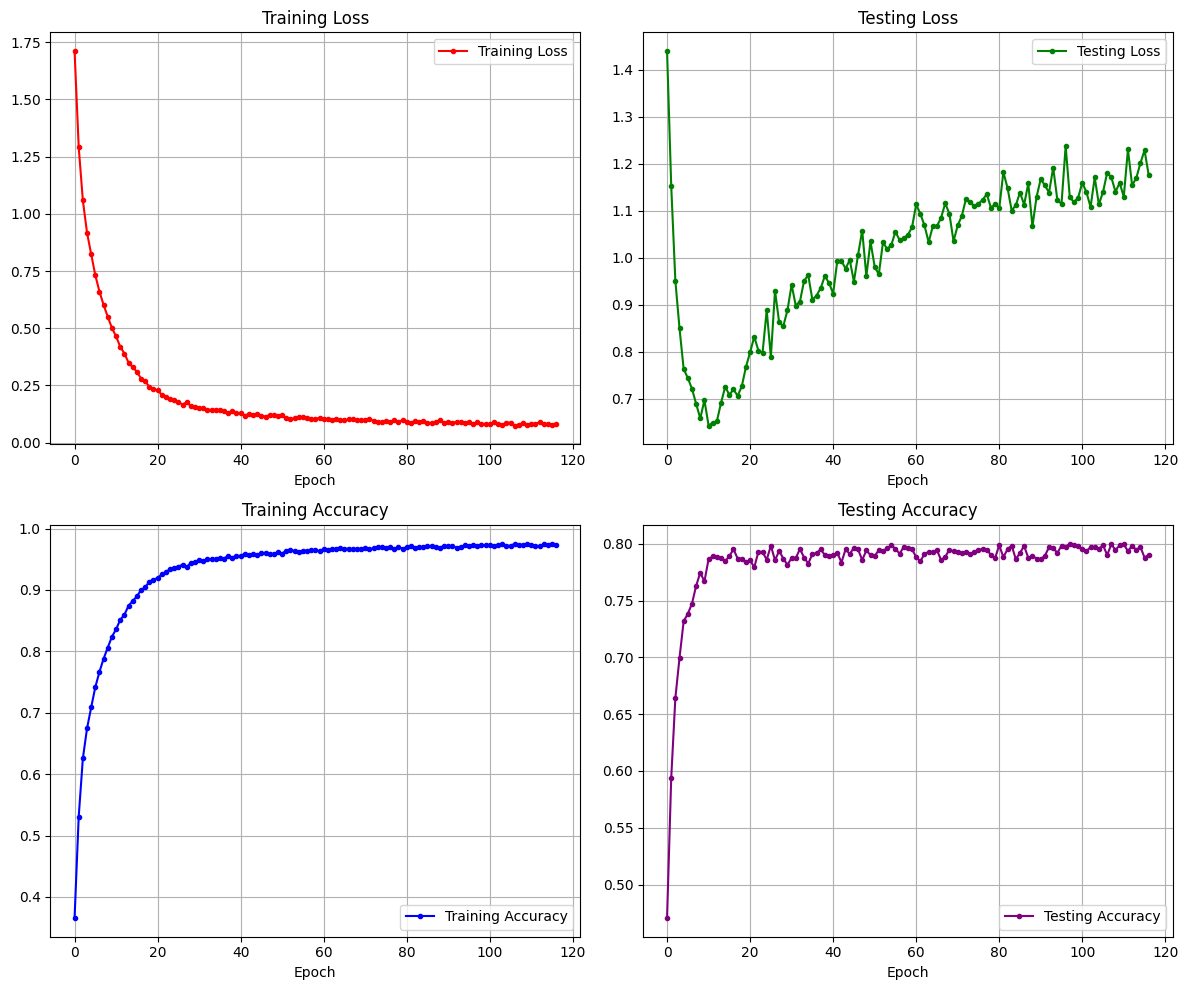

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Load the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Check the data
print(x_train.shape, y_train.shape) # (50000, 32, 32, 3) (50000, 1)
print(x_test.shape, y_test.shape)   # (10000, 32, 32, 3) (10000, 1)
print(x_train[0])
print(y_train[0])

# Data preprocessing
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Model configuration 
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Model compilation
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Model summary
model.summary()

# Model fitting
es = EarlyStopping(monitor='loss', patience=10, mode='auto')
modelpath = '../data/modelcheckpoint/k46_cifar10_{epoch:02d}-{val_loss:.4f}.hdf5'
cp = ModelCheckpoint(filepath=modelpath, monitor='val_loss', save_best_only=True, mode='auto')
hist = model.fit(x_train, y_train, epochs=200, batch_size=128, validation_split=0.2, callbacks=[es, cp])

# Model evaluation
loss = model.evaluate(x_test, y_test)
print('loss:', loss[0])
print('acc:', loss[1])

# Visualization
plt.figure(figsize=(12, 10))

# Training Loss
plt.subplot(2, 2, 1)
plt.plot(hist.history['loss'], marker='.', c='red', label='Training Loss')
plt.grid()
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.legend()

# Training Accuracy
plt.subplot(2, 2, 3)
plt.plot(hist.history['acc'], marker='.', c='blue', label='Training Accuracy')
plt.grid()
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Testing Loss
plt.subplot(2, 2, 2)
plt.plot(hist.history['val_loss'], marker='.', c='green', label='Testing Loss')
plt.grid()
plt.title('Testing Loss')
plt.xlabel('Epoch')
plt.legend()

# Testing Accuracy
plt.subplot(2, 2, 4)
plt.plot(hist.history['val_acc'], marker='.', c='purple', label='Testing Accuracy')
plt.grid()
plt.title('Testing Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


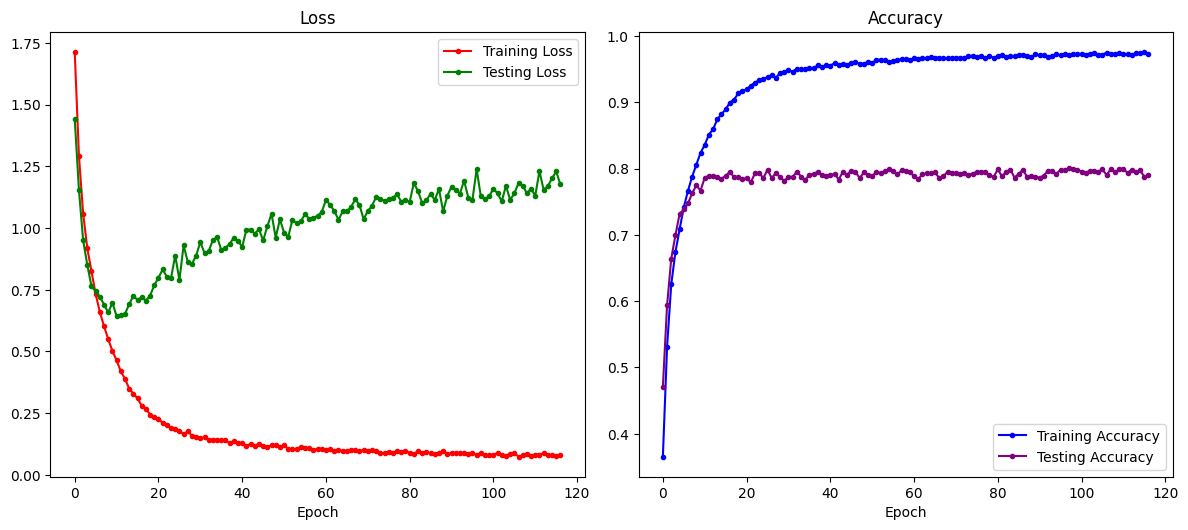

In [3]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))

# Training Loss
plt.subplot(2, 2, 1)
plt.plot(hist.history['loss'], marker='.', c='red', label='Training Loss')
plt.grid()
plt.plot(hist.history['val_loss'], marker='.', c='green', label='Testing Loss')
plt.grid()
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

# Training Accuracy
plt.subplot(2, 2, 2)
plt.plot(hist.history['acc'], marker='.', c='blue', label='Training Accuracy')
plt.grid()
plt.plot(hist.history['val_acc'], marker='.', c='purple', label='Testing Accuracy')
plt.grid()
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()


# Testing Loss
#plt.subplot(2, 2, 2)

# Testing Accuracy
#plt.subplot(2, 2, 4)


plt.tight_layout()
plt.show()

In [4]:
#save model
model.save('cifar10.h5')

In [5]:
#import model and predict
from tensorflow.keras.models import load_model
model = load_model('cifar10.h5')

y_pred = model.predict(x_test)
print(y_pred)
print(y_pred.shape) #(10000, 10)

print(np.argmax(y_pred, axis=1))
print(y_test)


313/313 [==============================] - 2s 5ms/step
[[4.2666393e-10 2.0729988e-06 1.9534825e-06 ... 1.3678294e-07
  5.8189329e-08 1.8288773e-10]
 [4.9436867e-06 2.1349913e-05 5.3554415e-21 ... 4.8473135e-19
  9.9997365e-01 3.9464054e-11]
 [5.0197099e-03 2.2317236e-03 1.8804718e-09 ... 5.2081579e-09
  9.9264610e-01 1.0251018e-04]
 ...
 [3.6732386e-25 4.2634453e-29 2.9281688e-11 ... 2.3220725e-16
  2.7936253e-22 6.0710859e-26]
 [2.8757072e-06 9.9571157e-01 1.5772548e-08 ... 6.1142924e-10
  1.1532975e-08 1.3113441e-08]
 [3.2186905e-25 6.5698637e-28 2.2909576e-19 ... 1.0000000e+00
  4.5633268e-21 4.5620645e-25]]
(10000, 10)
[3 8 8 ... 5 1 7]
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


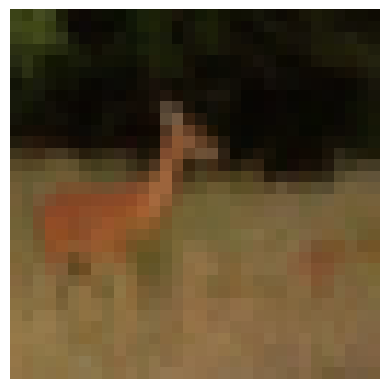

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 1s 761ms/step
[[1.37517345e-05 5.42182521e-09 2.91958754e-03 2.55126059e-01
  7.41200268e-01 2.99315730e-07 1.14204575e-07 7.39995972e-04
  1.30427946e-09 2.61022759e-09]]
deer


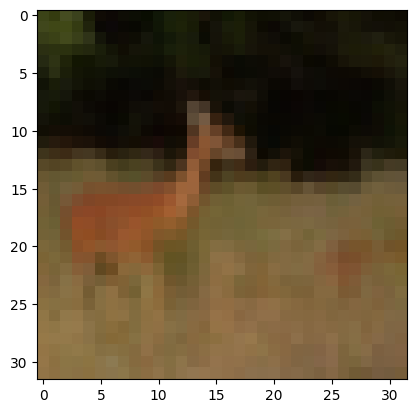

In [6]:
import matplotlib.pyplot as plt
#load a random image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
#load random image from dataset
# Load CIFAR-10 dataset
(x_train, _), (_, _) = cifar10.load_data()

# Choose a random index
random_index = np.random.randint(0, len(x_train))

# Get the random image
random_image = x_train[random_index]

# Display the image
plt.imshow(random_image)
plt.axis('off')
plt.figure(figsize=(5, 5))
plt.show()

img = random_image
#img = load_img(r'download (2).jpeg', target_size=(32,32))
img = img_to_array(img)
img = img.reshape(1,32,32,3)
img = img.astype('float32')/255.

result = model.predict(img)
print(result)

#assign labels so we can print the result
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print(labels[np.argmax(result)])
#shown the image with matplotlib
plt.imshow(img.reshape(32,32,3))
plt.show()




In [7]:
#performance metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = y_test.reshape(-1)

cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

print(classification_report(y_test, y_pred))

ModuleNotFoundError: No module named 'seaborn'

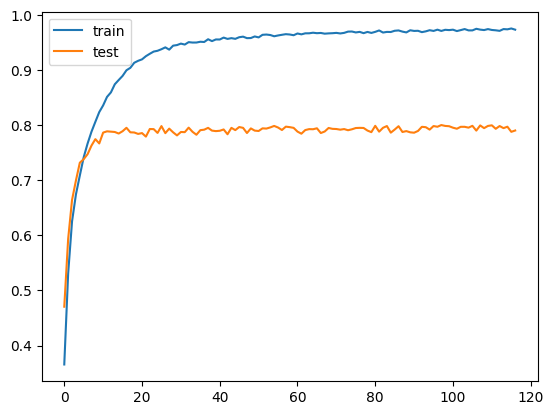

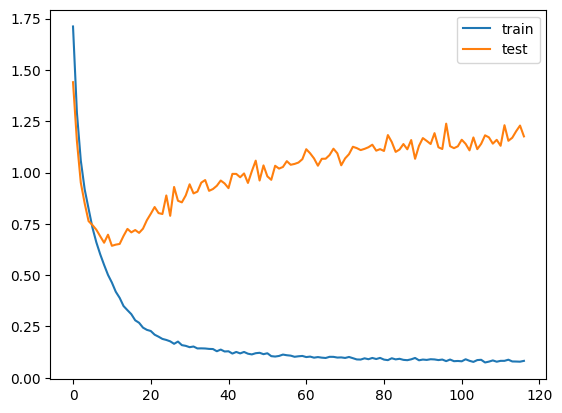

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

: 

In [8]:
#train vs test accuracy
plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='test')
plt.legend()
plt.show()

#train vs test loss
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.show()

#model summary
model.summary()